# Covid's impact on Stock  Markets

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import seaborn as sns

### Installed Required Libraries and commented them

In [2]:
#!pip install TimeSeries
#!pip install alpha_vantage

##### Step 2: Read the daily confirmed cases and deaths into two dataframes can be found at this github page:  

confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"  

deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [3]:
#Reading files
confirmed_cases_url = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_url = pd.read_csv(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [4]:
confirmed_cases_url.head(3) #Checking data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178373,178387,178418,178457,178513,178574,178611,178638,178648,178689
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274429,274462,274504,274520,274535,274606,274606,274737,274791,274828
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265738,265739,265739,265741,265746,265746,265754,265761,265761,265767


In [5]:
deaths_url.head(3) #Checking data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/15/22,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7676,7676,7678,7679,7680,7680,7680,7680,7681,7682
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3495,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,6875


##### Step 3: Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level

In [6]:
#Changing cols to rows and grouping them on global level
confirmed_cases_melt = pd.melt(confirmed_cases_url, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
confirmed_cases_melt['variable'] = pd.to_datetime(confirmed_cases_melt['variable'], format='%m/%d/%y')
confirmed_cases_melt['variable'] = confirmed_cases_melt['variable'].astype('datetime64[ns]')
confirmed_cases_melt = confirmed_cases_melt.rename(columns={'variable':'Date','value':'Confirmed_Cases'})

#Grouping and suming them on global level
confirmed_cases_melt1 = confirmed_cases_melt.groupby('Date', as_index=False)['Confirmed_Cases'].sum()

In [7]:
confirmed_cases_melt.head(3) #checking data

,Province/State,Country/Region,Lat,Long,Date,Confirmed_Cases
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0


In [8]:
confirmed_cases_melt1.head(3) #Checking data

,Date,Confirmed_Cases
0,2020-01-22,557
1,2020-01-23,657
2,2020-01-24,944


In [9]:
#following the same steps on deaths dataframe as performed on confirmed cases data frame 

deaths_url_melt = pd.melt(deaths_url, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
deaths_url_melt['variable'] = pd.to_datetime(deaths_url_melt['variable'], format='%m/%d/%y')
deaths_url_melt['variable'] = deaths_url_melt['variable'].astype('datetime64[ns]')
deaths_url_melt = deaths_url_melt.rename(columns={'variable':'Date','value':'Death_Cases'})
deaths_url_melt1 = deaths_url_melt.groupby('Date', as_index=False)['Death_Cases'].sum()


In [10]:
deaths_url_melt.head(3)

,Province/State,Country/Region,Lat,Long,Date,Death_Cases
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0


In [11]:
deaths_url_melt1.head(3)

,Date,Death_Cases
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26


In [12]:
#Joining both confirmed and death datasets on common column
coviddf = pd.merge(confirmed_cases_melt1, deaths_url_melt1, on=["Date", "Date"])
display(coviddf)

,Date,Confirmed_Cases,Death_Cases
0,2020-01-22,557,17
1,2020-01-23,657,18
2,2020-01-24,944,26
3,2020-01-25,1437,42
4,2020-01-26,2120,56
...,...,...,...
819,2022-04-20,507046645,6207909
820,2022-04-21,507947338,6211981
821,2022-04-22,508708884,6215610
822,2022-04-23,509196481,6217046


In [13]:
coviddf.Date.sort_values() #sorting values to check dtype, length, min and max
#2020-01-22
#2022-04-23

0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-25
4     2020-01-26
         ...    
819   2022-04-20
820   2022-04-21
821   2022-04-22
822   2022-04-23
823   2022-04-24
Name: Date, Length: 824, dtype: datetime64[ns]

##### Step 4: Research a stock for each below that reflects the following industries (it will be used in the next step):
1. Overall American Market [Selected: Google]
2. Overall Canadian Market [Selected: CIBC]
3. Travel sector [Selected: Expedia]
4. The Real Estate sector [Selected: CBRE Group Inc]
5. Precious metals (Gold, Silver, Platinum, etc) [Selected: SPDR Gold Trust ETF (Gold)]

In [14]:
key="1SX42F0G1BOJULOD" #storing key value to a variable which will be used to access stock markets data from alpha vantage

##### Step 5: Use AlphaVantage (the stock API used earlier in the course) to get the daily high and low prices for your selected stocks

In [15]:
#Reading data from alphavantage to dataframe
alpha1 = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=GOOGL&apikey=' + key + '&datatype=csv')
alpha1.head() ##American Market Google

,timestamp,open,high,low,close,volume
0,2022-04-22,2500.00,2508.04,2378.50,2392.71,2844186
1,2022-04-21,2585.00,2601.97,2490.53,2496.29,1822258
2,2022-04-20,2617.84,2627.98,2550.00,2560.80,1573067
3,2022-04-19,2553.83,2606.66,2539.99,2600.18,1324488
4,2022-04-18,2540.00,2564.25,2523.64,2553.53,1040433


In [16]:
alpha1.shape #Checking rows and columns

(4451, 6)

In [17]:
type(alpha1) #Checking datatypes

pandas.core.frame.DataFrame

In [18]:
#Renaming column names so that it will can be merged with covid datasets
alpha1.rename(columns = {'timestamp':'GOOGL_Date','open':'GOOGL_open','high':'GOOGL_high','low':'GOOGL_low','close':'GOOGL_close','volume':'GOOGL_volume' }, inplace = True)
alpha1.head()

,GOOGL_Date,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOGL_volume
0,2022-04-22,2500.00,2508.04,2378.50,2392.71,2844186
1,2022-04-21,2585.00,2601.97,2490.53,2496.29,1822258
2,2022-04-20,2617.84,2627.98,2550.00,2560.80,1573067
3,2022-04-19,2553.83,2606.66,2539.99,2600.18,1324488
4,2022-04-18,2540.00,2564.25,2523.64,2553.53,1040433


In [19]:
alpha1.GOOGL_Date.unique() #Checking unique date column

array(['2022-04-22', '2022-04-21', '2022-04-20', ..., '2004-08-23',
       '2004-08-20', '2004-08-19'], dtype=object)

In [20]:
alpha1.GOOGL_Date.sort_values() #Sorting to min, max and datatype

4450    2004-08-19
4449    2004-08-20
4448    2004-08-23
4447    2004-08-24
4446    2004-08-25
           ...    
4       2022-04-18
3       2022-04-19
2       2022-04-20
1       2022-04-21
0       2022-04-22
Name: GOOGL_Date, Length: 4451, dtype: object

In [21]:
#Repeating the steps for all other markets
alpha2 = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=CM&apikey=' + key + '&datatype=csv')
alpha2.head() #Canadian Market CIBC

,timestamp,open,high,low,close,volume
0,2022-04-22,116.00,116.260,113.24,113.36,446667
1,2022-04-21,118.86,119.590,116.60,117.01,471780
2,2022-04-20,117.15,118.935,116.89,117.99,415931
3,2022-04-19,115.35,115.720,114.80,115.69,274534
4,2022-04-18,114.56,115.230,114.32,114.83,268748


In [22]:
alpha2.shape

(5656, 6)

In [23]:
alpha2.rename(columns = {'timestamp':'CIBC_Date','open':'CIBC_open','high':'CIBC_high','low':'CIBC_low','close':'CIBC_close','volume':'CIBC_volume' }, inplace = True)
alpha2.head()

,CIBC_Date,CIBC_open,CIBC_high,CIBC_low,CIBC_close,CIBC_volume
0,2022-04-22,116.00,116.260,113.24,113.36,446667
1,2022-04-21,118.86,119.590,116.60,117.01,471780
2,2022-04-20,117.15,118.935,116.89,117.99,415931
3,2022-04-19,115.35,115.720,114.80,115.69,274534
4,2022-04-18,114.56,115.230,114.32,114.83,268748


In [24]:
alpha3 = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=EXPE&apikey=' + key + '&datatype=csv')
alpha3.head() #Travel sector Travel sector Expedia, Inc.

,timestamp,open,high,low,close,volume
0,2022-04-22,182.77,185.250,180.563,181.65,1916253
1,2022-04-21,193.30,196.780,182.520,183.39,2899494
2,2022-04-20,187.44,190.165,184.070,185.87,1473635
3,2022-04-19,186.25,188.690,184.000,186.34,1495593
4,2022-04-18,189.89,191.680,184.620,185.84,2383152


In [25]:
alpha3.rename(columns = {'timestamp':'EXPE_Date','open':'EXPE_open','high':'EXPE_high','low':'EXPE_low','close':'EXPE_close','volume':'EXPE_volume' }, inplace = True)
alpha3.head()

,EXPE_Date,EXPE_open,EXPE_high,EXPE_low,EXPE_close,EXPE_volume
0,2022-04-22,182.77,185.250,180.563,181.65,1916253
1,2022-04-21,193.30,196.780,182.520,183.39,2899494
2,2022-04-20,187.44,190.165,184.070,185.87,1473635
3,2022-04-19,186.25,188.690,184.000,186.34,1495593
4,2022-04-18,189.89,191.680,184.620,185.84,2383152


In [26]:
alpha4 = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=CBRE&apikey=' + key + '&datatype=csv')
alpha4.head() #The Real Estate sector #CBRE Group Inc

,timestamp,open,high,low,close,volume
0,2022-04-22,86.43,86.52,84.41,84.57,2010920
1,2022-04-21,88.73,89.76,86.34,86.54,1558463
2,2022-04-20,86.95,88.59,86.63,87.63,2774614
3,2022-04-19,85.81,87.37,85.69,86.46,3408493
4,2022-04-18,85.42,86.37,85.14,85.64,1707894


In [27]:
alpha4.rename(columns = {'timestamp':'CBRE_Date','open':'CBRE_open','high':'CBRE_high','low':'CBRE_low','close':'CBRE_close','volume':'CBRE_volume' }, inplace = True)
alpha4.head()

,CBRE_Date,CBRE_open,CBRE_high,CBRE_low,CBRE_close,CBRE_volume
0,2022-04-22,86.43,86.52,84.41,84.57,2010920
1,2022-04-21,88.73,89.76,86.34,86.54,1558463
2,2022-04-20,86.95,88.59,86.63,87.63,2774614
3,2022-04-19,85.81,87.37,85.69,86.46,3408493
4,2022-04-18,85.42,86.37,85.14,85.64,1707894


In [28]:
alpha5 = pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=GLD&apikey=' + key + '&datatype=csv')
alpha5.head() #	SPDR Gold Trust ETF #Precious metals (Gold)

,timestamp,open,high,low,close,volume
0,2022-04-22,180.7235,181.6050,179.740,180.29,9146973
1,2022-04-21,181.7700,182.3200,180.775,182.06,9639834
2,2022-04-20,181.5900,182.7200,181.350,182.71,6881433
3,2022-04-19,183.1900,183.6506,181.330,181.82,12585622
4,2022-04-18,185.9500,186.1000,184.390,184.61,8886690


In [29]:
alpha5.rename(columns = {'timestamp':'GLD_Date','open':'GLD_open','high':'GLD_high','low':'GLD_low','close':'GLD_close','volume':'GLD_volume' }, inplace = True)
alpha5.head()

,GLD_Date,GLD_open,GLD_high,GLD_low,GLD_close,GLD_volume
0,2022-04-22,180.7235,181.6050,179.740,180.29,9146973
1,2022-04-21,181.7700,182.3200,180.775,182.06,9639834
2,2022-04-20,181.5900,182.7200,181.350,182.71,6881433
3,2022-04-19,183.1900,183.6506,181.330,181.82,12585622
4,2022-04-18,185.9500,186.1000,184.390,184.61,8886690


In [30]:
coviddf.info() #checking columns and datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 0 to 823
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             824 non-null    datetime64[ns]
 1   Confirmed_Cases  824 non-null    int64         
 2   Death_Cases      824 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 25.8 KB


In [31]:
alpha4.info() #checking columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CBRE_Date    4499 non-null   object 
 1   CBRE_open    4499 non-null   float64
 2   CBRE_high    4499 non-null   float64
 3   CBRE_low     4499 non-null   float64
 4   CBRE_close   4499 non-null   float64
 5   CBRE_volume  4499 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 211.0+ KB


In [32]:
#Converting datatypes from string to date
alpha1['GOOGL_Date']= pd.to_datetime(alpha1['GOOGL_Date'])
alpha2['CIBC_Date']= pd.to_datetime(alpha2['CIBC_Date'])
alpha3['EXPE_Date']= pd.to_datetime(alpha3['EXPE_Date'])
alpha4['CBRE_Date']= pd.to_datetime(alpha4['CBRE_Date'])
alpha5['GLD_Date']= pd.to_datetime(alpha5['GLD_Date'])

In [33]:
alpha1.info() #verifying datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   GOOGL_Date    4451 non-null   datetime64[ns]
 1   GOOGL_open    4451 non-null   float64       
 2   GOOGL_high    4451 non-null   float64       
 3   GOOGL_low     4451 non-null   float64       
 4   GOOGL_close   4451 non-null   float64       
 5   GOOGL_volume  4451 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 208.8 KB


In [34]:
alpha1 #Checking dataset in dataframe

,GOOGL_Date,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOGL_volume
0,2022-04-22,2500.00,2508.04,2378.50,2392.710,2844186
1,2022-04-21,2585.00,2601.97,2490.53,2496.290,1822258
2,2022-04-20,2617.84,2627.98,2550.00,2560.800,1573067
3,2022-04-19,2553.83,2606.66,2539.99,2600.180,1324488
4,2022-04-18,2540.00,2564.25,2523.64,2553.530,1040433
...,...,...,...,...,...,...
4446,2004-08-25,104.76,108.00,103.88,106.000,9188600
4447,2004-08-24,111.24,111.60,103.57,104.870,15247300
4448,2004-08-23,110.76,113.48,109.05,109.400,18256100
4449,2004-08-20,101.01,109.08,100.50,108.310,22834300


In [35]:
alpha1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4451 entries, 0 to 4450
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   GOOGL_Date    4451 non-null   datetime64[ns]
 1   GOOGL_open    4451 non-null   float64       
 2   GOOGL_high    4451 non-null   float64       
 3   GOOGL_low     4451 non-null   float64       
 4   GOOGL_close   4451 non-null   float64       
 5   GOOGL_volume  4451 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 208.8 KB


##### Step 6: Append that info to the data frame created in step 3

In [36]:
#Merging Google stok market df with covid
m_df = pd.merge(coviddf, alpha1, left_on = "Date", right_on = "GOOGL_Date", how = "inner", suffixes=('_',''))

In [37]:
#Merging CIBC to the df
m_df = pd.merge(m_df, alpha2, left_on = "Date", right_on = "CIBC_Date", how = "inner", suffixes=('_',''))
m_df

,Date,Confirmed_Cases,Death_Cases,GOOGL_Date,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOGL_volume,CIBC_Date,CIBC_open,CIBC_high,CIBC_low,CIBC_close,CIBC_volume
0,2020-01-22,557,17,2020-01-22,1489.73,1500.58,1482.66,1484.17,1422946,2020-01-22,82.85,83.070,82.65,82.72,259368
1,2020-01-23,657,18,2020-01-23,1487.55,1493.50,1480.32,1484.69,1332562,2020-01-23,82.50,82.990,82.06,82.98,326880
2,2020-01-24,944,26,2020-01-24,1492.82,1494.20,1463.18,1466.17,1489280,2020-01-24,82.95,83.150,82.56,82.86,454031
3,2020-01-27,2929,82,2020-01-27,1431.54,1436.58,1419.50,1431.73,1706566,2020-01-27,82.01,82.550,81.73,82.39,336167
4,2020-01-28,5580,131,2020-01-28,1441.74,1454.80,1430.36,1450.50,1486586,2020-01-28,82.58,83.150,82.39,83.11,292304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2022-04-18,505089291,6200008,2022-04-18,2540.00,2564.25,2523.64,2553.53,1040433,2022-04-18,114.56,115.230,114.32,114.83,268748
565,2022-04-19,506082451,6203411,2022-04-19,2553.83,2606.66,2539.99,2600.18,1324488,2022-04-19,115.35,115.720,114.80,115.69,274534
566,2022-04-20,507046645,6207909,2022-04-20,2617.84,2627.98,2550.00,2560.80,1573067,2022-04-20,117.15,118.935,116.89,117.99,415931
567,2022-04-21,507947338,6211981,2022-04-21,2585.00,2601.97,2490.53,2496.29,1822258,2022-04-21,118.86,119.590,116.60,117.01,471780


In [38]:
m_df

,Date,Confirmed_Cases,Death_Cases,GOOGL_Date,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOGL_volume,CIBC_Date,CIBC_open,CIBC_high,CIBC_low,CIBC_close,CIBC_volume
0,2020-01-22,557,17,2020-01-22,1489.73,1500.58,1482.66,1484.17,1422946,2020-01-22,82.85,83.070,82.65,82.72,259368
1,2020-01-23,657,18,2020-01-23,1487.55,1493.50,1480.32,1484.69,1332562,2020-01-23,82.50,82.990,82.06,82.98,326880
2,2020-01-24,944,26,2020-01-24,1492.82,1494.20,1463.18,1466.17,1489280,2020-01-24,82.95,83.150,82.56,82.86,454031
3,2020-01-27,2929,82,2020-01-27,1431.54,1436.58,1419.50,1431.73,1706566,2020-01-27,82.01,82.550,81.73,82.39,336167
4,2020-01-28,5580,131,2020-01-28,1441.74,1454.80,1430.36,1450.50,1486586,2020-01-28,82.58,83.150,82.39,83.11,292304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2022-04-18,505089291,6200008,2022-04-18,2540.00,2564.25,2523.64,2553.53,1040433,2022-04-18,114.56,115.230,114.32,114.83,268748
565,2022-04-19,506082451,6203411,2022-04-19,2553.83,2606.66,2539.99,2600.18,1324488,2022-04-19,115.35,115.720,114.80,115.69,274534
566,2022-04-20,507046645,6207909,2022-04-20,2617.84,2627.98,2550.00,2560.80,1573067,2022-04-20,117.15,118.935,116.89,117.99,415931
567,2022-04-21,507947338,6211981,2022-04-21,2585.00,2601.97,2490.53,2496.29,1822258,2022-04-21,118.86,119.590,116.60,117.01,471780


In [39]:
#Merging Expedia to the df
m_df = pd.merge(m_df, alpha3, left_on = "Date", right_on = "EXPE_Date", how = "inner", suffixes=('_',''))
m_df.head(2)

,Date,Confirmed_Cases,Death_Cases,GOOGL_Date,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOGL_volume,CIBC_Date,...,CIBC_high,CIBC_low,CIBC_close,CIBC_volume,EXPE_Date,EXPE_open,EXPE_high,EXPE_low,EXPE_close,EXPE_volume
0,2020-01-22,557,17,2020-01-22,1489.73,1500.58,1482.66,1484.17,1422946,2020-01-22,...,83.07,82.65,82.72,259368,2020-01-22,110.71,111.874,109.88,110.03,1578402
1,2020-01-23,657,18,2020-01-23,1487.55,1493.50,1480.32,1484.69,1332562,2020-01-23,...,82.99,82.06,82.98,326880,2020-01-23,109.46,114.090,109.25,113.73,3225389


In [40]:
#Merging CBRE to the df
m_df = pd.merge(m_df, alpha4, left_on = "Date", right_on = "CBRE_Date", how = "inner", suffixes=('_',''))
m_df

,Date,Confirmed_Cases,Death_Cases,GOOGL_Date,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOGL_volume,CIBC_Date,...,EXPE_high,EXPE_low,EXPE_close,EXPE_volume,CBRE_Date,CBRE_open,CBRE_high,CBRE_low,CBRE_close,CBRE_volume
0,2020-01-22,557,17,2020-01-22,1489.73,1500.58,1482.66,1484.17,1422946,2020-01-22,...,111.874,109.880,110.03,1578402,2020-01-22,61.67,61.78,60.82,60.91,892000
1,2020-01-23,657,18,2020-01-23,1487.55,1493.50,1480.32,1484.69,1332562,2020-01-23,...,114.090,109.250,113.73,3225389,2020-01-23,60.74,61.37,60.35,60.84,1026942
2,2020-01-24,944,26,2020-01-24,1492.82,1494.20,1463.18,1466.17,1489280,2020-01-24,...,114.280,111.731,112.14,1693654,2020-01-24,60.62,61.04,60.26,60.77,1509946
3,2020-01-27,2929,82,2020-01-27,1431.54,1436.58,1419.50,1431.73,1706566,2020-01-27,...,109.885,106.890,109.08,2036663,2020-01-27,59.66,60.49,59.26,60.44,1782002
4,2020-01-28,5580,131,2020-01-28,1441.74,1454.80,1430.36,1450.50,1486586,2020-01-28,...,110.400,109.000,109.11,1666921,2020-01-28,60.84,61.59,60.81,61.46,1105796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2022-04-18,505089291,6200008,2022-04-18,2540.00,2564.25,2523.64,2553.53,1040433,2022-04-18,...,191.680,184.620,185.84,2383152,2022-04-18,85.42,86.37,85.14,85.64,1707894
565,2022-04-19,506082451,6203411,2022-04-19,2553.83,2606.66,2539.99,2600.18,1324488,2022-04-19,...,188.690,184.000,186.34,1495593,2022-04-19,85.81,87.37,85.69,86.46,3408493
566,2022-04-20,507046645,6207909,2022-04-20,2617.84,2627.98,2550.00,2560.80,1573067,2022-04-20,...,190.165,184.070,185.87,1473635,2022-04-20,86.95,88.59,86.63,87.63,2774614
567,2022-04-21,507947338,6211981,2022-04-21,2585.00,2601.97,2490.53,2496.29,1822258,2022-04-21,...,196.780,182.520,183.39,2899494,2022-04-21,88.73,89.76,86.34,86.54,1558463


In [41]:
#Merging Gold df to the df
m_df = pd.merge(m_df, alpha5, left_on = "Date", right_on = "GLD_Date", how = "inner", suffixes=('_',''))
m_df

,Date,Confirmed_Cases,Death_Cases,GOOGL_Date,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOGL_volume,CIBC_Date,...,CBRE_high,CBRE_low,CBRE_close,CBRE_volume,GLD_Date,GLD_open,GLD_high,GLD_low,GLD_close,GLD_volume
0,2020-01-22,557,17,2020-01-22,1489.73,1500.58,1482.66,1484.17,1422946,2020-01-22,...,61.78,60.82,60.91,892000,2020-01-22,146.6800,146.8100,146.3800,146.79,4772215
1,2020-01-23,657,18,2020-01-23,1487.55,1493.50,1480.32,1484.69,1332562,2020-01-23,...,61.37,60.35,60.84,1026942,2020-01-23,147.0000,147.6200,146.6200,147.12,8411937
2,2020-01-24,944,26,2020-01-24,1492.82,1494.20,1463.18,1466.17,1489280,2020-01-24,...,61.04,60.26,60.77,1509946,2020-01-24,146.9221,148.3800,146.8900,147.98,9913786
3,2020-01-27,2929,82,2020-01-27,1431.54,1436.58,1419.50,1431.73,1706566,2020-01-27,...,60.49,59.26,60.44,1782002,2020-01-27,149.2100,149.3200,148.4575,148.99,9963178
4,2020-01-28,5580,131,2020-01-28,1441.74,1454.80,1430.36,1450.50,1486586,2020-01-28,...,61.59,60.81,61.46,1105796,2020-01-28,148.3600,148.5600,147.5300,147.66,7507154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2022-04-18,505089291,6200008,2022-04-18,2540.00,2564.25,2523.64,2553.53,1040433,2022-04-18,...,86.37,85.14,85.64,1707894,2022-04-18,185.9500,186.1000,184.3900,184.61,8886690
565,2022-04-19,506082451,6203411,2022-04-19,2553.83,2606.66,2539.99,2600.18,1324488,2022-04-19,...,87.37,85.69,86.46,3408493,2022-04-19,183.1900,183.6506,181.3300,181.82,12585622
566,2022-04-20,507046645,6207909,2022-04-20,2617.84,2627.98,2550.00,2560.80,1573067,2022-04-20,...,88.59,86.63,87.63,2774614,2022-04-20,181.5900,182.7200,181.3500,182.71,6881433
567,2022-04-21,507947338,6211981,2022-04-21,2585.00,2601.97,2490.53,2496.29,1822258,2022-04-21,...,89.76,86.34,86.54,1558463,2022-04-21,181.7700,182.3200,180.7750,182.06,9639834


In [42]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             569 non-null    datetime64[ns]
 1   Confirmed_Cases  569 non-null    int64         
 2   Death_Cases      569 non-null    int64         
 3   GOOGL_Date       569 non-null    datetime64[ns]
 4   GOOGL_open       569 non-null    float64       
 5   GOOGL_high       569 non-null    float64       
 6   GOOGL_low        569 non-null    float64       
 7   GOOGL_close      569 non-null    float64       
 8   GOOGL_volume     569 non-null    int64         
 9   CIBC_Date        569 non-null    datetime64[ns]
 10  CIBC_open        569 non-null    float64       
 11  CIBC_high        569 non-null    float64       
 12  CIBC_low         569 non-null    float64       
 13  CIBC_close       569 non-null    float64       
 14  CIBC_volume      569 non-null    int64    

In [43]:
#Dropping unwanted columns
m_df.drop(['GOOGL_Date','GOOGL_open','GOOGL_close','GOOGL_volume','CIBC_Date','CIBC_open','CIBC_close','CIBC_volume','EXPE_Date','EXPE_open','EXPE_close','EXPE_volume','CBRE_Date','CBRE_open','CBRE_close','CBRE_volume', 'GLD_Date','GLD_volume','GLD_close','GLD_open'], axis=1, inplace=True)
m_df

,Date,Confirmed_Cases,Death_Cases,GOOGL_high,GOOGL_low,CIBC_high,CIBC_low,EXPE_high,EXPE_low,CBRE_high,CBRE_low,GLD_high,GLD_low
0,2020-01-22,557,17,1500.58,1482.66,83.070,82.65,111.874,109.880,61.78,60.82,146.8100,146.3800
1,2020-01-23,657,18,1493.50,1480.32,82.990,82.06,114.090,109.250,61.37,60.35,147.6200,146.6200
2,2020-01-24,944,26,1494.20,1463.18,83.150,82.56,114.280,111.731,61.04,60.26,148.3800,146.8900
3,2020-01-27,2929,82,1436.58,1419.50,82.550,81.73,109.885,106.890,60.49,59.26,149.3200,148.4575
4,2020-01-28,5580,131,1454.80,1430.36,83.150,82.39,110.400,109.000,61.59,60.81,148.5600,147.5300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2022-04-18,505089291,6200008,2564.25,2523.64,115.230,114.32,191.680,184.620,86.37,85.14,186.1000,184.3900
565,2022-04-19,506082451,6203411,2606.66,2539.99,115.720,114.80,188.690,184.000,87.37,85.69,183.6506,181.3300
566,2022-04-20,507046645,6207909,2627.98,2550.00,118.935,116.89,190.165,184.070,88.59,86.63,182.7200,181.3500
567,2022-04-21,507947338,6211981,2601.97,2490.53,119.590,116.60,196.780,182.520,89.76,86.34,182.3200,180.7750


##### Step 7: Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib

In [44]:
#Checking Correlation
corr= m_df.corr()
corr

#Covid datasets and Stock market datasets are highly correlated

,Confirmed_Cases,Death_Cases,GOOGL_high,GOOGL_low,CIBC_high,CIBC_low,EXPE_high,EXPE_low,CBRE_high,CBRE_low,GLD_high,GLD_low
Confirmed_Cases,1.000000,0.954715,0.865254,0.856886,0.882991,0.875241,0.840752,0.831829,0.830376,0.825359,0.331271,0.345731
Death_Cases,0.954715,1.000000,0.966880,0.962278,0.953311,0.948755,0.901366,0.897264,0.934318,0.931355,0.301089,0.323330
GOOGL_high,0.865254,0.966880,1.000000,0.999250,0.955796,0.954828,0.889711,0.891335,0.969548,0.970028,0.216633,0.245547
GOOGL_low,0.856886,0.962278,0.999250,1.000000,0.954519,0.954191,0.888173,0.890810,0.968510,0.969785,0.216022,0.246170
CIBC_high,0.882991,0.953311,0.955796,0.954519,1.000000,0.999105,0.938602,0.940109,0.963375,0.964610,0.242955,0.270215
CIBC_low,0.875241,0.948755,0.954828,0.954191,0.999105,1.000000,0.940075,0.942786,0.961862,0.964196,0.250091,0.278842
EXPE_high,0.840752,0.901366,0.889711,0.888173,0.938602,0.940075,1.000000,0.998160,0.917995,0.919162,0.222924,0.251067
EXPE_low,0.831829,0.897264,0.891335,0.890810,0.940109,0.942786,0.998160,1.000000,0.918843,0.921436,0.226355,0.256448
CBRE_high,0.830376,0.934318,0.969548,0.968510,0.963375,0.961862,0.917995,0.918843,1.000000,0.998954,0.080387,0.109799
CBRE_low,0.825359,0.931355,0.970028,0.969785,0.964610,0.964196,0.919162,0.921436,0.998954,1.000000,0.088510,0.119274


<AxesSubplot:>

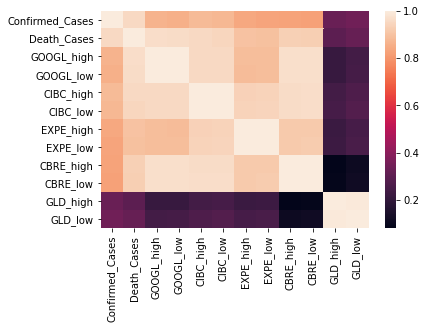

In [45]:
sns.heatmap(corr) #Except Gold, we see all other stock markets are highly correlated
#Heatmap is used to see the correlation between all the quantities

<AxesSubplot:xlabel='Confirmed_Cases', ylabel='EXPE_low'>

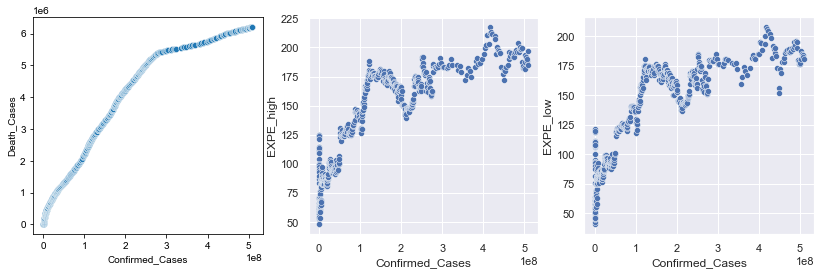

In [46]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.set_theme(style="darkgrid")
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="Death_Cases",palette='Dark2', legend=True) 

plt.subplot(1,3,2)
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="EXPE_high", legend=True) 

plt.subplot(1,3,3)
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="EXPE_low", legend=True)

#Scatter plot is used to see the correlation between two quantities


<AxesSubplot:xlabel='Confirmed_Cases', ylabel='CBRE_low'>

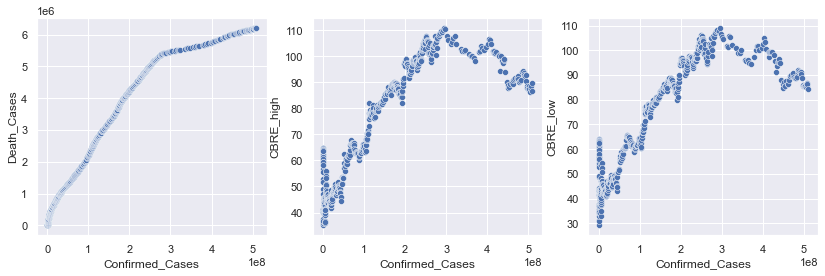

In [47]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.set_theme(style="darkgrid")
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="Death_Cases",palette='Dark2', legend=True) 

plt.subplot(1,3,2)
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="CBRE_high", legend=True)

plt.subplot(1,3,3)
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="CBRE_low", legend=True)


<AxesSubplot:xlabel='Confirmed_Cases', ylabel='GLD_low'>

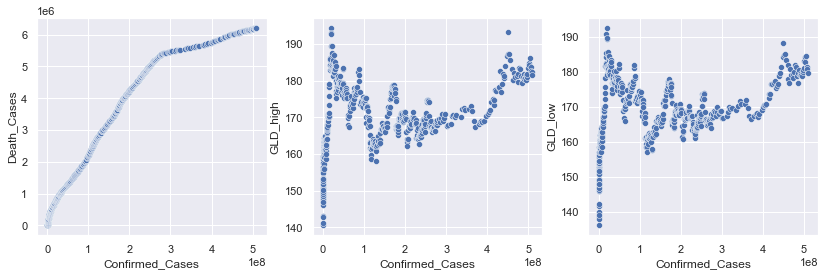

In [48]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.set_theme(style="darkgrid")
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="Death_Cases",palette='Dark2', legend=True) 

plt.subplot(1,3,2)
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="GLD_high", legend=True)

plt.subplot(1,3,3)
sns.scatterplot(data=m_df, x="Confirmed_Cases", y="GLD_low", legend=True)


### Confirmed Vs Death Cases

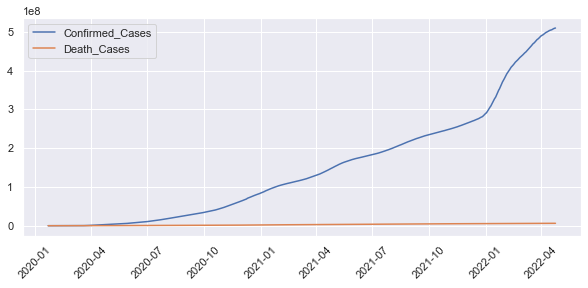

In [49]:
#plt.subplot(1, 2, 1)
plt.figure(figsize=(10,4)) #width,height
plt.plot(coviddf.Date, coviddf.Confirmed_Cases)
plt.plot(coviddf.Date, coviddf.Death_Cases)
plt.legend(["Confirmed_Cases", "Death_Cases"], loc ="upper left")
plt.xticks(rotation=45)

plt.show()



### Google Stock Markets - High, Low & Open, Close Visualizations

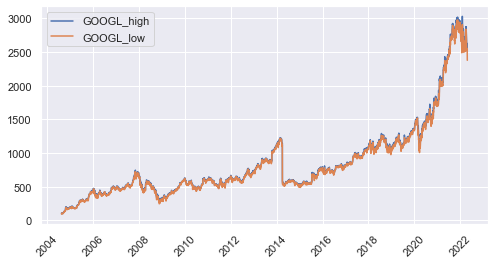

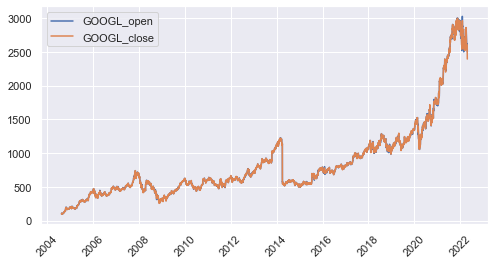

In [50]:
#plt.subplot(1, 2, 1)
plt.figure(figsize=(8,4)) #width,height
plt.plot(alpha1.GOOGL_Date, alpha1.GOOGL_high)
plt.plot(alpha1.GOOGL_Date, alpha1.GOOGL_low)
plt.legend(["GOOGL_high", "GOOGL_low"], loc ="upper left")
plt.xticks(rotation=45)
plt.show()

#plt.subplot(1, 2, 2)
plt.figure(figsize=(8,4)) #width,height
plt.plot(alpha1.GOOGL_Date, alpha1.GOOGL_open)
plt.plot(alpha1.GOOGL_Date, alpha1.GOOGL_close)
plt.legend(["GOOGL_open","GOOGL_close"], loc ="upper left")
plt.xticks(rotation=45)


plt.show()

#This Visual is to show there is no visble difference between high and low vs open and close
#And, we will be proceeding to see the data for high and lows for all the markets and see how the covid has impacted the stock markets

### Covid's impacts on Google Stock Markets

Google Stock Markets started going down during starting of Jan 2020 from this graph and we can see it hit low around April 2020.
And, again there was a dip during consecutive covid waves.
Line graph is selected to plot these graphs as it is timeseries datasets.

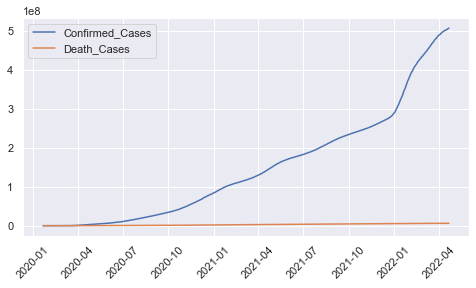

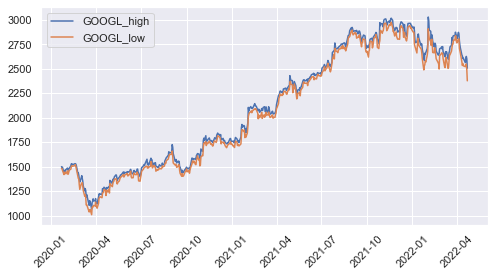

In [51]:
plt.figure(figsize=(8,4)) #width,height
plt.plot(m_df.Date, m_df.Confirmed_Cases)
plt.plot(m_df.Date, m_df.Death_Cases)
plt.legend(["Confirmed_Cases", "Death_Cases"], loc ="upper left")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4)) #width,height
plt.plot(m_df.Date, m_df.GOOGL_high)
plt.plot(m_df.Date, m_df.GOOGL_low)
plt.legend(["GOOGL_high","GOOGL_low"], loc ="upper left")
plt.xticks(rotation=45)
plt.show()

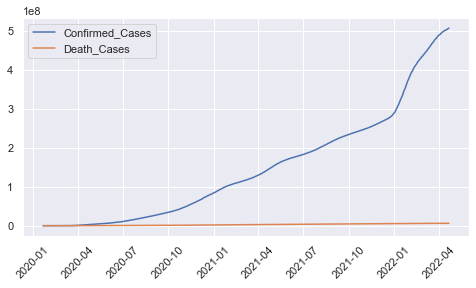

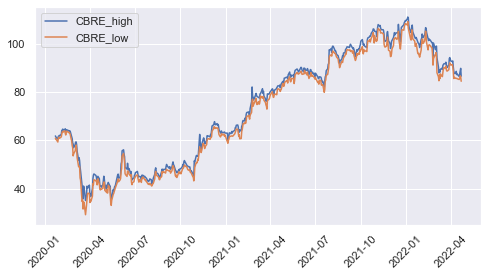

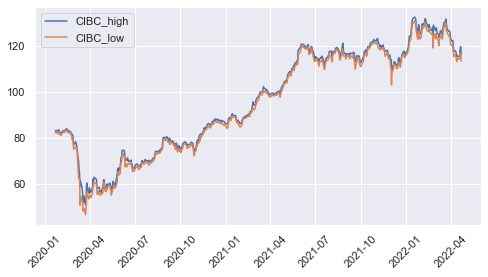

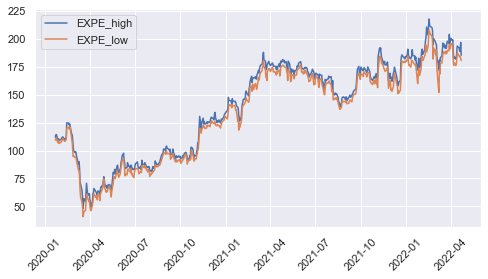

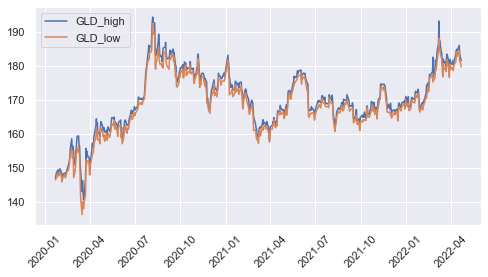

In [52]:
plt.figure(figsize=(8,4)) #width,height
plt.plot(m_df.Date, m_df.Confirmed_Cases)
plt.plot(m_df.Date, m_df.Death_Cases)
plt.legend(["Confirmed_Cases", "Death_Cases"], loc ="upper left")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4)) #width,height
plt.plot(m_df.Date, m_df.CBRE_high)
plt.plot(m_df.Date, m_df.CBRE_low)
plt.legend(["CBRE_high","CBRE_low"], loc ="upper left")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4)) #width,height
plt.plot(m_df.Date, m_df.CIBC_high)
plt.plot(m_df.Date, m_df.CIBC_low)
plt.legend(["CIBC_high","CIBC_low"], loc ="upper left")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(m_df.Date, m_df.EXPE_high)
plt.plot(m_df.Date, m_df.EXPE_low)
plt.legend(["EXPE_high","EXPE_low"], loc ="upper left")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(m_df.Date, m_df.GLD_high)
plt.plot(m_df.Date, m_df.GLD_low)
plt.legend(["GLD_high","GLD_low"], loc ="upper left")
plt.xticks(rotation=45)
plt.show()

#All the stock markets exhibits the similar impacts due to covid as it has on Google and it is deatiled above.

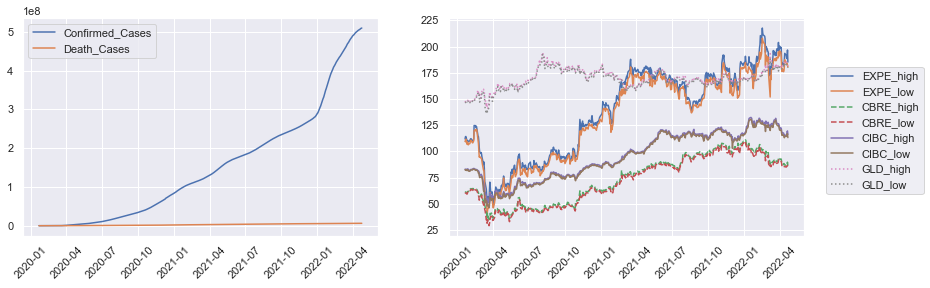

In [59]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
plt.plot(coviddf.Date, coviddf.Confirmed_Cases)
plt.plot(coviddf.Date, coviddf.Death_Cases)
plt.legend(["Confirmed_Cases", "Death_Cases"], loc ="upper left")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
#plt.plot(m_df.Date, m_df.GOOGL_high)
#plt.plot(m_df.Date, m_df.GOOGL_low)
plt.plot(m_df.Date, m_df.EXPE_high)
plt.plot(m_df.Date, m_df.EXPE_low)
plt.plot(m_df.Date, m_df.CBRE_high,'--')
plt.plot(m_df.Date, m_df.CBRE_low,'--')
plt.plot(m_df.Date, m_df.CIBC_high)
plt.plot(m_df.Date, m_df.CIBC_low)
plt.plot(m_df.Date, m_df.GLD_high,':')
plt.plot(m_df.Date, m_df.GLD_low,':')

plt.legend(["EXPE_high","EXPE_low","CBRE_high","CBRE_low","CIBC_high","CIBC_low","GLD_high","GLD_low"], loc ="upper center",bbox_to_anchor=(1.2, 0.8))
plt.xticks(rotation=45)
plt.show()

#All the stock markets exhibits the similar impacts due to covid as it has on Google and it is deatiled above.

### Conclusion

As we  see from the graph, Gold has lesser impact because of Covid and Real Estate Sector is the most affected stock in the market due to covid.
Over all the stock market starting rolling down from Jan 2020 and hit the bottom around March 2020 and we can also see the fluctuations and dip around the consecutive covid waves.